In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def constplot(cs,fs,nbins=50,ax=None,aspect=10,cmap='jet',target=None):
    if ax==None:
        f, ax = plt.subplots()
    bcs =np.linspace(0,1,nbins)
    bfs =np.linspace(-12,0,nbins)
    o,a,b = np.histogram2d(fs,cs,bins=[bfs,bcs])#,range=((-1,1),(-1,1)))
    #o,a,b = np.histogram2d(cs,fs,bins=[bcs,bfs])#,range=((-1,1),(-1,1)))
    aaa=ax.imshow(10*np.log10(o[:,::-1].T)
              ,extent=(-12,0,0,1.0)
              ,aspect=aspect
              ,cmap=cmap)
    colorbar(aaa,ax=ax)
    return o,bfs,bcs

In [4]:
folder='./save/embed/'

In [9]:
'''train'''

filename0='cs_fs_for_object_list_bilingual_train_log_3_tags_epoch45'
filename0='cs_fs_for_object_list_bilingual_train_log_3_tags_epoch45_ENGE'

print(filename0)
data=np.load(folder+filename0+'.npz',allow_pickle=True)
cs_collect = data['cs_collect'][()]
fs_collect = data['fs_collect'][()]

print(cs_collect.keys())

cs_fs_for_object_list_bilingual_train_log_3_tags_epoch45_ENGE
dict_keys(['car', 'train', 'airplane', 'boat', 'television', 'clock', 'phone', 'camera', 'dog', 'cow', 'tree', 'mountain'])


1) Plot Sim_Contextual vs F_score

In [24]:
#if object_file == "object_list_bilingual_train":
from data.PWI.object_list_bilingual import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list 

print(len(food_list),food_list)
print(len(animal_list),animal_list)
Nscan = len(food_list)

12 ['car', 'train', 'airplane', 'boat', 'television', 'clock', 'phone', 'camera', 'dog', 'cow', 'tree', 'mountain']
12 ['dog', 'cow', 'duck', 'eagle', 'corn', 'stone', 'leaf', 'magazine', 'car', 'train', 'wine', 'hair']


In [25]:
print(pseudo_list)

['hund', 'kuh', 'ente', 'adler', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']


In [26]:
cs_same_all=[]
cs_diff_all=[]
cs_pseudo_all=[]
cs_hypernymy_all=[]
fs_same_all=[]
fs_diff_all=[]
fs_pseudo_all=[]
fs_hypernymy_all=[]
for food_idid in range(0,Nscan):    
    food_list2=[food_list[food_idid]]
    target_object=food_list2[0]
    cs_same_all+=cs_collect[target_object]['same']
    cs_diff_all+=cs_collect[target_object]['diff']
    cs_pseudo_all+=cs_collect[target_object]['pseudo']
    cs_hypernymy_all+=cs_collect[target_object]['hypernymy']
    fs_same_all+=list(fs_collect[target_object]['same']*-1)
    fs_diff_all+=list(fs_collect[target_object]['diff']*-1)
    fs_pseudo_all+=list(fs_collect[target_object]['pseudo']*-1)
    fs_hypernymy_all+=list(fs_collect[target_object]['hypernymy']*-1)

In [27]:
for key in cs_collect.keys():
    print("'"+str(key)+"'","("+str(len(cs_collect[key]['diff']))+"),",end='')

'car' (311),'train' (282),'airplane' (14),'boat' (349),'television' (20),'clock' (307),'phone' (475),'camera' (21),'dog' (963),'cow' (535),'tree' (286),'mountain' (47),

In [28]:
def constplot(cs,fs,nbins=50,ax=None,aspect=10,cmap='twilight_shifted',target=None):
    if ax==None:
        f, ax = plt.subplots()
    bcs =np.linspace(0,1,nbins)
    #bfs =np.linspace(-12,0,nbins)
    bfs =np.linspace(0,14,nbins)
    #o,a,b = np.histogram2d(fs,cs,bins=[bfs,bcs])#,range=((-1,1),(-1,1)))
    o,a,b = np.histogram2d(cs,fs,bins=[bcs,bfs])#,range=((-1,1),(-1,1)))
    im=ax.imshow(10*np.log10(o[:,::-1].T)
              ,extent=(0,1.0,0,12)
              ,aspect=aspect
              ,cmap=cmap
                ,vmin=0, vmax=45)
    #colorbar(aaa,ax=ax)
    return o,bfs,bcs,im

./save/figures/plot_cs_fs_for_object_list_bilingual_train_log_3_tags_epoch45_ENGE.svg


C:\Users\lab\anaconda3\envs\visualbert\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


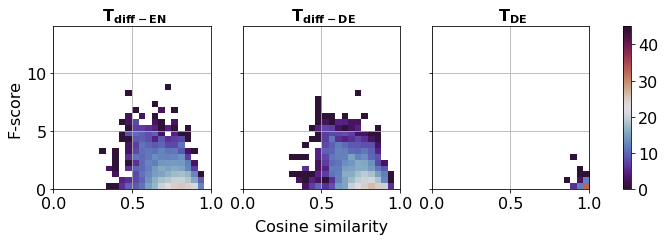

In [39]:
import matplotlib

nbins=25
aspect=8
fs=16
xa,xb=0,14


matplotlib.rc('xtick', labelsize=fs) 
matplotlib.rc('ytick', labelsize=fs) 


fig, ax = plt.subplots(1, 3,figsize=[12,3],sharey=True)

#o1,bfs,bcs,im=constplot(cs_same_all[:len(fs_same_all)],fs_same_all,nbins,ax[0],aspect);
o1,bfs,bcs,im=constplot(cs_diff_all,fs_diff_all,nbins,ax[0],aspect);
o2,bfs,bcs,im=constplot(cs_pseudo_all,fs_pseudo_all,nbins,ax[1],aspect);
o3,bfs,bcs,im=constplot(cs_hypernymy_all,fs_hypernymy_all,nbins,ax[2],aspect);


ax[0].set_aspect('auto')
ax[0].set_ylim([xa,xb])
#ax[0].set_xlim([0.0,1.05])
ax[0].set_xlabel('Cosine similarity',fontsize=fs)
ax[0].xaxis.set_label_coords(1.7,-0.18)
ax[0].set_ylabel('F-score',fontsize=fs)
ax[0].set_title(r' $\bf T_{diff-EN}$',fontsize=fs)

ax[0].grid()
#ax[1].set_title('diff category \n %s to %s'%(answer_item,animal_list[ans_pos]))
ax[1].set_aspect('auto')
ax[1].set_ylim([xa,xb])
ax[1].set_title(r' $\bf T_{diff-DE}$',fontsize=fs)
ax[1].grid()
#ax[1].set_xlabel('Cosine similarity',fontsize=fs)

#ax[2].set_title('pseudo \n %s to %s'%(answer_item,pseudo_list[ans_pos]))
ax[2].set_aspect('auto')
ax[2].set_ylim([xa,xb])
ax[2].set_title(r' $\bf T_{DE}$',fontsize=fs)
ax[2].grid()
#ax[2].set_xlabel('Cosine similarity',fontsize=fs)

# #ax[3].set_title('hypernymy \n %s to %s'%(answer_item,hypernymy_list[ans_pos]))
# ax[3].set_aspect('auto')
# ax[3].set_ylim([xa,xb])
# ax[3].grid()

fig.colorbar(im, ax=ax.ravel().tolist())

folderfigure='./save/figures/'
figuresave=folderfigure+'plot_{}.svg'.format(filename0)
print(figuresave)
#savefig(figuresave)

2) Gaussian Fit

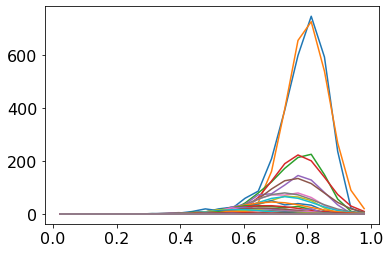

In [46]:
from scipy.optimize import curve_fit

def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

#data = numpy.random.normal(size=10000)+10
fit_mean=[]
for i in range(0,o1.shape[0]-0):
    data=((o1+o2).T)[i]
    data=data[data!= float('-inf')]
    #hist, bin_edges = numpy.histogram(data, density=True)
    bin_centres = (bcs[:-1] + bcs[1:])/2
    # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
    p0 = [0.2, 0., 1.]

    coeff, var_matrix = curve_fit(gauss, bin_centres, data, p0=p0,maxfev =5000)

    hist_fit = gauss(bin_centres, *coeff)
    fit_mean.append(coeff[1])
    plot(bin_centres, data, label='Test data')
    plot(bin_centres, hist_fit, label='Fitted data')

Text(0.5, 0, 'F-score')

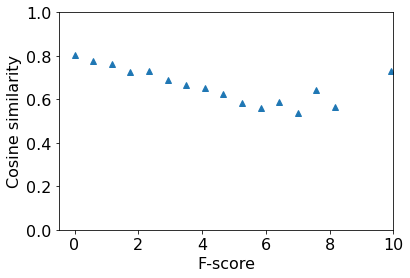

In [52]:
plot(bfs[:-1],fit_mean,'^')
ylim([0,1])
xlim([-0.5,10])
ylabel('Cosine similarity',fontsize=fs)
xlabel('F-score',fontsize=fs)

In [55]:
filename0='./save/embed/category_gaussian_fit_all_bilingual.npz'
data=np.load(filename0)
ENGE_0th_all=data['ENGE_0th_all']
EN_0th_all=data['EN_0th_all']
ENGE_12th_all=data['ENGE_12th_all']
EN_12th_all=data['EN_12th_all']
bfs=data['bfs']

filename0='./save/embed/category_gaussian_fit_all_bilingual_GEVQA.npz'
data=np.load(filename0)
GE_0th_all=data['GE_0th_all']
GE_12th_all=data['GE_12th_all']

xend=15
ENGE_0th=ENGE_0th_all[:xend]
EN_0th=EN_0th_all[:xend]
ENGE_12th=ENGE_12th_all[:xend]
EN_12th=EN_12th_all[:xend]

GE_0th=GE_0th_all[:xend]
GE_12th=GE_12th_all[:xend]

x1=bfs[:xend]

train1=(ENGE_12th+EN_12th+GE_12th)/3
z = np.polyfit(x1, train1, 1)
p1 = np.poly1d(z)
#p(xp)
print(p1)
train0=(ENGE_0th+EN_0th+GE_0th)/3
z = np.polyfit(x1, train0, 1)
p0 = np.poly1d(z)
#p(xp)
print(p0)


 
-0.02447 x + 0.7377
 
-0.003764 x + 0.1513


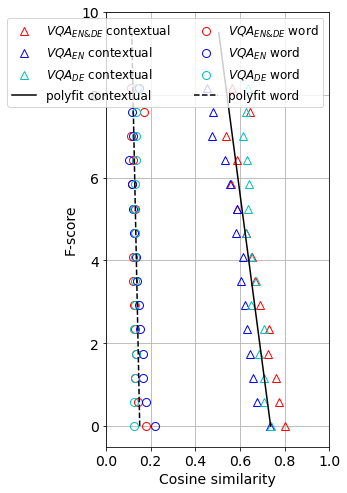

In [59]:
figure(figsize=[4,8])

xp = np.linspace(0, 9.5, 10)

ms=8
fs=14
plot(ENGE_12th,x1,'^',ms=ms,linestyle = 'None',markeredgecolor='r',markerfacecolor='None')
plot(EN_12th,x1,'^',ms=ms,linestyle = 'None',markeredgecolor='b',markerfacecolor='None')
plot(GE_12th,x1,'^',ms=ms,linestyle = 'None',markeredgecolor='c',markerfacecolor='None')
plot(p1(xp),xp,'k')

plot(ENGE_0th,x1,marker ='o',ms=ms,linestyle = 'None',markeredgecolor='r',markerfacecolor='None')
plot(EN_0th,x1,marker ='o',ms=ms,linestyle = 'None',markeredgecolor='b',markerfacecolor='None')
plot(GE_0th,x1,'o',ms=ms,linestyle = 'None',markeredgecolor='c',markerfacecolor='None')
plot(p0(xp),xp,'k--')



xlim([0,1.0])
ylim([-0.5,10])

legend([r'$VQA_{EN&DE}$ contextual',
       '$VQA_{EN}$ contextual',   
       '$VQA_{DE}$ contextual',        
       'polyfit contextual',
       '$VQA_{EN&DE}$ word',
       '$VQA_{EN}$ word',
       '$VQA_{DE}$ word',
       'polyfit word'],
       fontsize=fs-2,
       ncol=2
      )
ylabel('F-score',fontsize=fs)
xlabel('Cosine similarity',fontsize=fs)
grid()
matplotlib.rc('ytick', labelsize=fs) 
matplotlib.rc('xtick', labelsize=fs) 


3) F_score vs F_score

In [33]:
def constplot2(cs,fs,nbins=50,ax=None,aspect=10,cmap='twilight_shifted',target=None):

    bcs =np.linspace(0,12,nbins)
    bfs =np.linspace(0,12,nbins)
    o,a,b = np.histogram2d(fs,cs,bins=[bfs,bcs])#,range=((-1,1),(-1,1)))
    #o,a,b = np.histogram2d(cs,fs,bins=[bcs,bfs])#,range=((-1,1),(-1,1)))
    im=imshow(10*np.log10(o[:,::-1].T)
              ,extent=(0,10,0,10)
              ,aspect=1
              ,cmap=cmap)
    grid()
    return o,bfs,bcs,im

./save/figures/plot_F2F_cs_fs_for_object_list_bilingual_train_log_3_tags_epoch45_ENGE.svg


C:\Users\lab\anaconda3\envs\visualbert\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


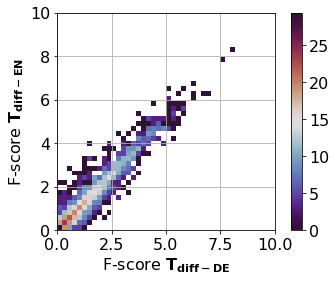

In [34]:
nbins=45
fig = plt.figure()

ax = fig.add_subplot(111)

o1,bfs,bcs,im=constplot2(fs_diff_all,fs_pseudo_all,nbins,aspect);

fig.colorbar(im, ax=ax)

xa,xb=0,10

ax.set_aspect(1)
ax.set_ylim([xa,xb])
ax.set_xlim([xa,xb])

ax.set_ylabel(r'F-score $\bf T_{diff-EN}$',fontsize=fs)
#ax.xaxis.set_label_coords(1.7,-0.18)
ax.set_xlabel(r'F-score $\bf T_{diff-DE}$',fontsize=fs)

folderfigure='./save/figures/'
figuresave=folderfigure+'plot_F2F_{}.svg'.format(filename0)
print(figuresave)
#savefig(figuresave)